In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
calhoun_president = pd.read_csv('./calhoun-president.txt')
calhoun_straight_party = pd.read_csv('./calhoun-straight-party.txt')

In [13]:
calhoun_straight_party['sp_total'] = (
    calhoun_straight_party['democrat'] + 
    calhoun_straight_party['republican'] +
    calhoun_straight_party['libertarian'] +
    calhoun_straight_party['taxpayers'] +
    calhoun_straight_party['working_class'] +
    calhoun_straight_party['green'] +
    calhoun_straight_party['natural_law']
)

In [14]:
calhoun_straight_party['percentage_republican'] = calhoun_straight_party['republican'] / calhoun_straight_party['sp_total']

In [15]:
calhoun_president['direct_trump_votes'] = calhoun_president['trump'] - calhoun_straight_party['republican']
calhoun_president['trump_vote_percentage'] = calhoun_president['trump'] / calhoun_president['poll_book']

In [16]:
straight_republican_percentage = calhoun_straight_party['percentage_republican'].tolist()
trump_relative_performance = (calhoun_president['trump_vote_percentage'] - calhoun_straight_party['percentage_republican']).tolist()

slope_points_x = []
slope_points_y = []

for index, value in enumerate(straight_republican_percentage):
    if value > 0.2:
        slope_points_x.append(value)
        slope_points_y.append(trump_relative_performance[index])  

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)

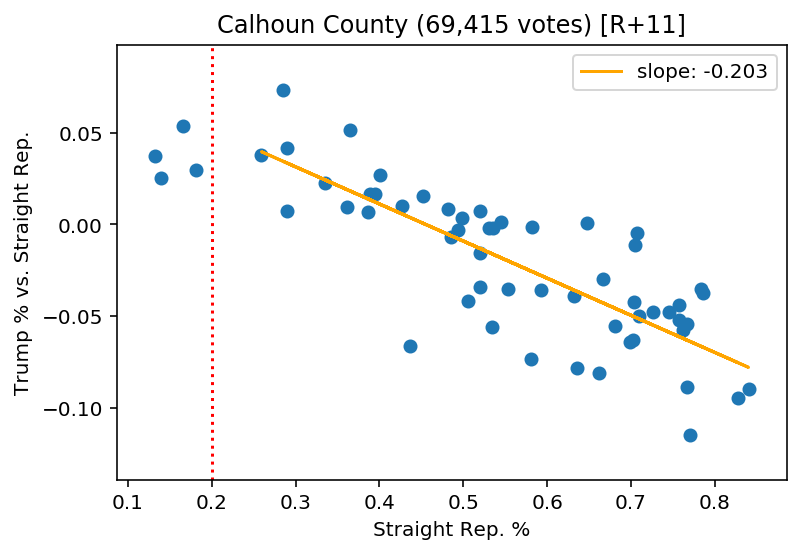

In [18]:
plt.scatter(
    straight_republican_percentage,
    trump_relative_performance
)

plt.xlabel('Straight Rep. %')
plt.ylabel('Trump % vs. Straight Rep.')
plt.axvline(x=0.2, color='red', linestyle='dotted')

plt.plot(x, m*x + b, color='orange', label=f'slope: {round(m, 3)}')
plt.legend(loc=0)

plt.title('Calhoun County (69,415 votes) [R+11]')

plt.show()